In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:

# Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:

df=df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'],axis=1)

In [5]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Convert target variable to binary: 1 if readmitted within 30 days, 0 otherwise
y = np.where(y == le.transform(['<30'])[0], 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8729 - loss: 0.4013 - val_accuracy: 0.8877 - val_loss: 0.3395
Epoch 2/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8910 - loss: 0.3468 - val_accuracy: 0.8877 - val_loss: 0.3384
Epoch 3/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8878 - loss: 0.3449 - val_accuracy: 0.8878 - val_loss: 0.3377
Epoch 4/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8885 - loss: 0.3408 - val_accuracy: 0.8878 - val_loss: 0.3375
Epoch 5/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8857 - loss: 0.3445 - val_accuracy: 0.8877 - val_loss: 0.3378
Epoch 6/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8896 - loss: 0.3360 - val_accuracy: 0.8878 - val_loss: 0.3374
Epoch 7/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8894 - loss: 0.3370 - val_accuracy: 0.8878 - val_loss: 0.3372
Epoch 8/50
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8894 - loss: 0.3360 - 

637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8874 - loss: 0.3391
Test Accuracy: 0.89


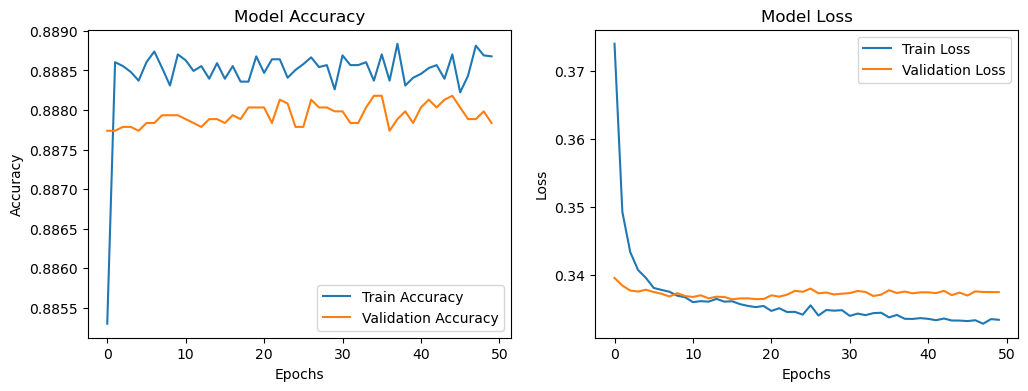

In [8]:
 #Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()